In [59]:
import math
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import re
import numpy as np
plt.rcParams['ps.useafm'] = True
plt.rcParams['pdf.use14corefonts'] = True
plt.rcParams['text.usetex'] = True
# sudo apt-get install texlive-latex-base texlive-fonts-recommended texlive-fonts-extra texlive-latex-extra
fontsize=25


In [23]:
import matplotlib.colors as mcolors

default_blue = mcolors.to_hex(mcolors.TABLEAU_COLORS['tab:blue'])
default_orange = mcolors.to_hex(mcolors.TABLEAU_COLORS['tab:orange'])

In [24]:
def replace_graph_names(df):
    df["Input Graph"] = df["Input Graph"].str.replace("com-", "", regex=True)\
                                    .str.replace(".gbbs.txt", "", regex=True)\
                                    .str.replace(".bin", "", regex=True)\
                                    .str.replace(".ungraph.txt", "", regex=True)\
                                    .str.replace(".graph.txt", "", regex=True)

def set_face_grid_ax_ticks(g):
    """Set fontsize for x and y axis ticks for all axes in a FacetGrid."""
    for ax in g.axes.flat:
        set_ax_ticks(ax)


def set_ax_ticks(ax):
    for l in ax.yaxis.get_ticklabels():
        l.set_fontsize(fontsize)
    for l in ax.xaxis.get_ticklabels():
        l.set_fontsize(fontsize)
        
def common_ax_style(ax):
    ax.set_xticks([1, 4, 8, 16, 30, 60])
    ax.set_xticklabels([1, 4, 8, 16, 30, "30h"])
    
    ax.set_yscale('log')
    # plt.yticks([0.03, 0.1, 0.3, 1])
    # ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

    set_ax_ticks(ax)
        
    ax.set_xlabel("Threads", fontsize = fontsize)

def plot_data(df, ax, color_dict=None):
    if color_dict is not None:
        sns.lineplot(data=df, x="Threads", y="Cluster Time", hue="Clusterer Name", palette=color_dict, linewidth=3, ax=ax)
        sns.scatterplot(data=df, x="Threads", y="Cluster Time", hue="Clusterer Name", palette=color_dict, s=30, ax=ax, legend=False)
    else:
        sns.lineplot(data=df, x="Threads", y="Cluster Time", hue="Clusterer Name", linewidth=3, ax=ax)
        sns.scatterplot(data=df, x="Threads", y="Cluster Time", hue="Clusterer Name", s=30, ax=ax, legend=False)
    ax.legend(loc='upper left', ncol=1, bbox_to_anchor=(1, 0.8), frameon=False, fontsize=fontsize-5)


## plot scalability

/Users/sy/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sy/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sy/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sy/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

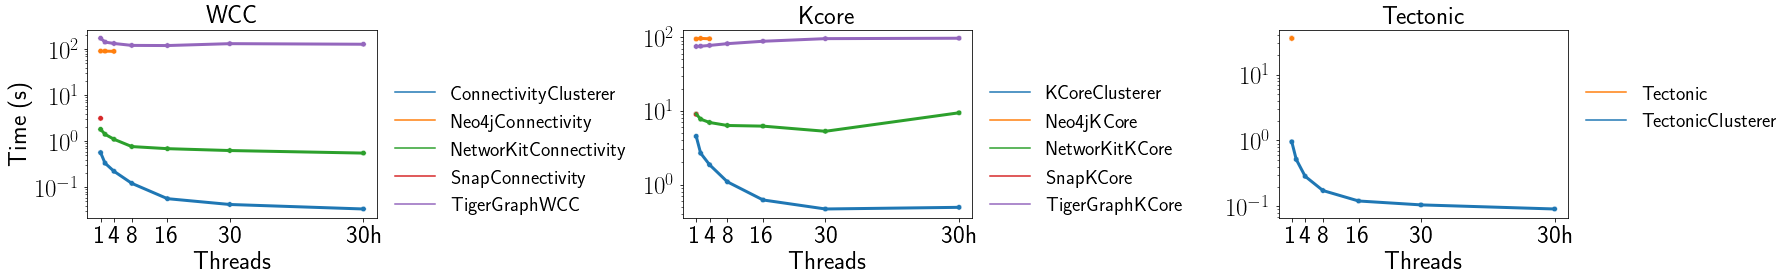

In [7]:
df = pd.read_csv("/Users/sy/Desktop/MIT/clusterer/csv/Graph Clustering Framework  - scalability_all.csv")
df = df[df["Round"] != 0] # remove first round
df = df.dropna(how='all')
df['Config'].fillna('none', inplace=True)

# df['Config'] = df['Config'].str.replace(",match_real_tectonic: false", "", regex=False)
# df = df[df["Config"] != "threshold: 10"]
# df = df[df['Input Graph'].isin([graph_name])]
# print(df.head())

# Average over rounds
df = df.groupby(['Clusterer Name', 'Input Graph', 'Threads', 'Config'])['Cluster Time'].mean().reset_index()
wcc_data = df[df["Clusterer Name"].isin(["ConnectivityClusterer", "SnapConnectivity", "NetworKitConnectivity", "TigerGraphWCC", "Neo4jConnectivity"])]
kcore_data = df[df["Clusterer Name"].isin(["KCoreClusterer", "SnapKCore", "NetworKitKCore", "TigerGraphKCore", "Neo4jKCore"])]
tectonic_data = df[df["Clusterer Name"].isin(["TectonicClusterer", "Tectonic"])]

fig, axs = plt.subplots(1, 3, constrained_layout=False, figsize =(25,4))#, gridspec_kw=gs_kw)
ax = axs[0]
plot_data(wcc_data, ax)
common_ax_style(ax)
ax.set_title("WCC", fontsize=fontsize)
ax.set_ylabel("Time (s)", fontsize = fontsize)

ax = axs[1]
plot_data(kcore_data, ax)
common_ax_style(ax)
ax.set_title("Kcore", fontsize=fontsize)
ax.set_ylabel("")

ax = axs[2]
color_dict = {
    "Tectonic": default_orange,
    "TectonicClusterer":default_blue
}
plot_data(tectonic_data, ax, color_dict)
common_ax_style(ax)
ax.set_title("Tectonic", fontsize=fontsize)
ax.set_ylabel("")

plt.tight_layout()
plt.savefig("../results/runtime.pdf")

In [76]:
df_slpa["Clusterer Name"].unique()

array(['Neo4jSLPA', 'SLPAClusterer'], dtype=object)

/Users/sy/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sy/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sy/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sy/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

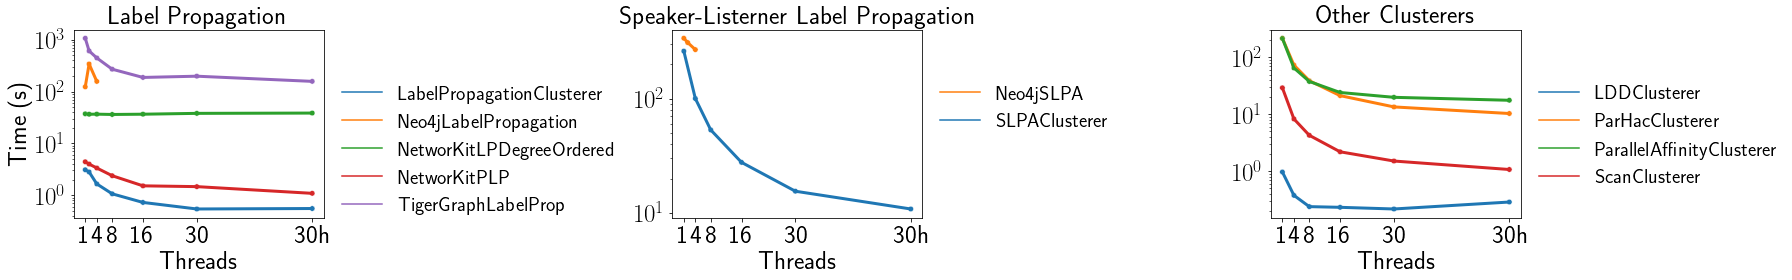

In [10]:
df = pd.read_csv("/Users/sy/Desktop/MIT/clusterer/csv/Graph Clustering Framework  - scalability_label.csv")
df = df[~df["Clusterer Name"].isin(["SLPAClusterer"])] # SPLAClusterer is using wrong config
df2 = pd.read_csv("/Users/sy/Desktop/MIT/clusterer/csv/Graph Clustering Framework  - scalability_all.csv")

df_ours = pd.read_csv("/Users/sy/Desktop/MIT/clusterer/csv/scalability_ours.csv")
df_ours = df_ours[df_ours["Round"]!=0][['Clusterer Name', 'Input Graph', "Threads", "Cluster Time"]]
df_ours = df_ours.groupby(['Clusterer Name', 'Input Graph', "Threads"]).mean().reset_index()

df_other_ours = df_ours[~df_ours["Clusterer Name"].isin(["ParallelModularityClusterer", "ParallelCorrelationClusterer"])]


df = pd.concat([df, df2])
df = df[df["Round"] != 0] # remove first round
df = df.dropna(how='all')
df['Config'].fillna('none', inplace=True)
fontsize=25
# Average over rounds
df = df.groupby(['Clusterer Name', 'Input Graph', 'Threads', 'Config'])['Cluster Time'].mean().reset_index()

df_lp = df[df["Clusterer Name"].isin(['LabelPropagationClusterer', 'Neo4jLabelPropagation',
                               'NetworKitLPDegreeOrdered', 'NetworKitPLP', 'TigerGraphLabelProp'])]
df_slpa =  df[df["Clusterer Name"].isin(["Neo4jSLPA", "SLPAClusterer", "TigerGraphSLLabelProp"])]


fig, axs = plt.subplots(1, 3, constrained_layout=False, figsize =(25,4))#, gridspec_kw=gs_kw)
ax = axs[0]
plot_data(df_lp, ax)
common_ax_style(ax)
ax.set_title("Label Propagation", fontsize=fontsize)
ax.set_ylabel("Time (s)", fontsize = fontsize)

ax = axs[1]
color_dict = {
    "Neo4jSLPA": default_orange,
    "SLPAClusterer":default_blue
}
plot_data(df_slpa, ax, color_dict)
common_ax_style(ax)
ax.set_title("Speaker-Listerner Label Propagation", fontsize=fontsize)
ax.set_ylabel("")

ax = axs[2]
plot_data(df_other_ours , ax)
common_ax_style(ax)
ax.set_title("Other Clusterers", fontsize=fontsize)
ax.set_ylabel("")



plt.tight_layout()
plt.savefig("../results/runtime_lp.pdf")

/Users/sy/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sy/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Time (s)')

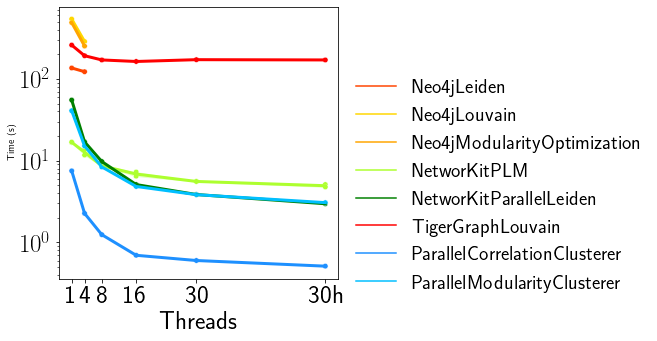

In [20]:

df_modularity = df[df["Clusterer Name"].isin(['Neo4jLeiden', 'Neo4jLouvain', 'Neo4jModularityOptimization', 
                                              'NetworKitPLM', 'NetworKitParallelLeiden', 'TigerGraphLouvain'])]


df_modularity_ours = df_ours[df_ours["Clusterer Name"].isin(["ParallelModularityClusterer", "ParallelCorrelationClusterer"])]
df_modularity = pd.concat([df_modularity, df_modularity_ours])

fig, ax = plt.subplots(1, 1, constrained_layout=False, figsize =(5,5))#, gridspec_kw=gs_kw)
color_dict = {
    'Neo4jLeiden': '#FF4500',  # Orange Red
    'Neo4jLouvain': '#FFD700',  # Gold
    'Neo4jModularityOptimization': '#FFA500',  # Orange
    'NetworKitPLM': '#ADFF2F',  # Greenyellow
    'NetworKitParallelLeiden': "green",  # Chartreuse
    'TigerGraphLouvain':  'red', 
    'ParallelCorrelationClusterer': '#1E90FF',  # Dodgerblue
    'ParallelModularityClusterer': '#00BFFF'  # Deepskyblue
}

plot_data(df_modularity, ax, color_dict )
common_ax_style(ax)
# ax.set_title("Other", fontsize=fontsize)
ax.set_ylabel("Time (s)")

In [13]:
df_modularity["Clusterer Name"].unique()

array(['Neo4jLeiden', 'Neo4jLouvain', 'Neo4jModularityOptimization',
       'NetworKitPLM', 'NetworKitParallelLeiden', 'TigerGraphLouvain',
       'ParallelCorrelationClusterer', 'ParallelModularityClusterer'],
      dtype=object)

## Runtime Compare

In [121]:
fontsize=30
our_name = "ParC"

In [171]:
def plot_runtime_compare(df, base, filename, title, ncol=5, height=5):
    replace_graph_names(df)

    df_avg = df.groupby(['Clusterer Name', 'Input Graph'])['Cluster Time'].mean().reset_index()

    ## compute "speedup", actually the slowdown
    df_base = df_avg[df_avg["Clusterer Name"]==base]
    df_base = df_base.rename(columns={'Cluster Time': 'Base Time'})
    df_base = df_base.drop(columns=["Clusterer Name"])
    df_avg = df_avg.merge(df_base, on=['Input Graph'])
    df_avg["Speedup"] =  df_avg["Cluster Time"] / df_avg["Base Time"] 

    plt.figure(figsize=(12, height))
    # order the bars, so the base method is the first one 
    methods = df_avg["Clusterer Name"].unique().tolist()
    methods.remove(base)
    methods = [base] + methods
    ax = sns.barplot(data=df_avg, x='Input Graph', y='Speedup', hue='Clusterer Name', palette='viridis',
                     hue_order=methods,
                    order=["amazon", "youtube", "dblp", "lj", "orkut", "friendster"])
    plt.ylabel('Slowdown', fontsize=fontsize-5)
    plt.xlabel("")

    plt.yscale('log')
#     plt.yticks([1, 10, 100, 1e3, 1e4])
#     plt.legend(loc='upper right')
    if ncol == 5:
        y_anchor = 1.2
    elif ncol == 4:
        y_anchor = 1.5
    elif ncol == 3:
        y_anchor = 1.9
    
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(handles, labels, loc='upper center', ncol=ncol, bbox_to_anchor=(0.5, y_anchor), 
               frameon=False, fontsize=fontsize-5,  handletextpad=0.3,
               columnspacing=0.6)
    set_ax_ticks(ax)
    plt.title(title, fontsize=fontsize-5, y=y_anchor-0.05)

    plt.tight_layout()
    plt.savefig(filename)


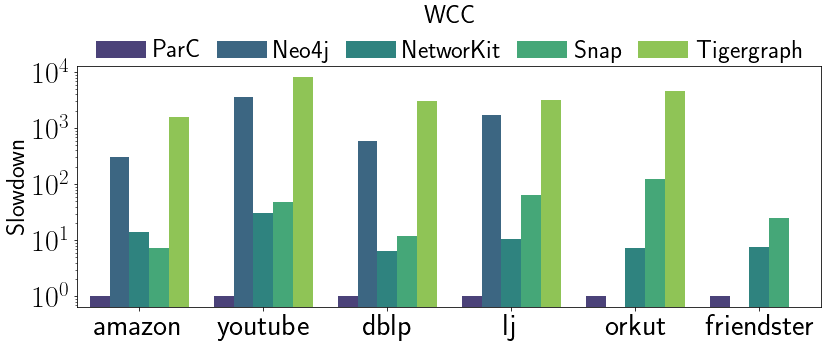

In [160]:
df = pd.read_csv("/Users/sy/Desktop/MIT/clusterer/csv/Graph Clustering Framework  - WCC_runtime_compare.csv")
df["Clusterer Name"] = df["Clusterer Name"].str.replace("ConnectivityClusterer", our_name)
df["Clusterer Name"] = df["Clusterer Name"].str.replace("Connectivity", "")

plot_runtime_compare(df, our_name , "../results/out_wcc_slowdown.pdf", "WCC", 5)

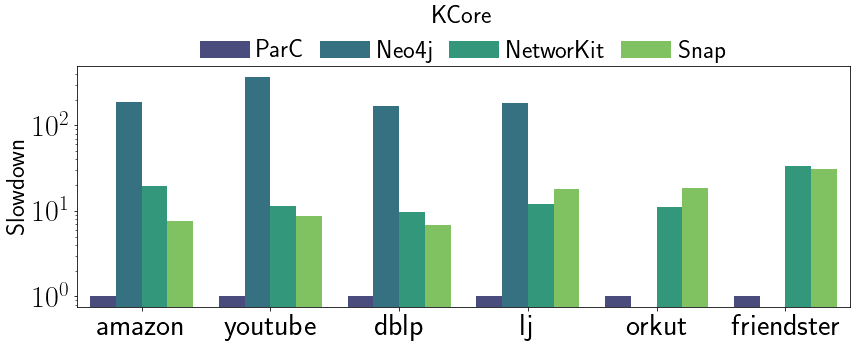

In [161]:
df = pd.read_csv("/Users/sy/Desktop/MIT/clusterer/csv/Graph Clustering Framework  - KCore_runtime_compare.csv")
df["Clusterer Name"] = df["Clusterer Name"].str.replace("KCoreClusterer", our_name)
df["Clusterer Name"] = df["Clusterer Name"].str.replace("KCore", "")
plot_runtime_compare(df, our_name ,"../results/out_kcore_slowdown.pdf", "KCore")

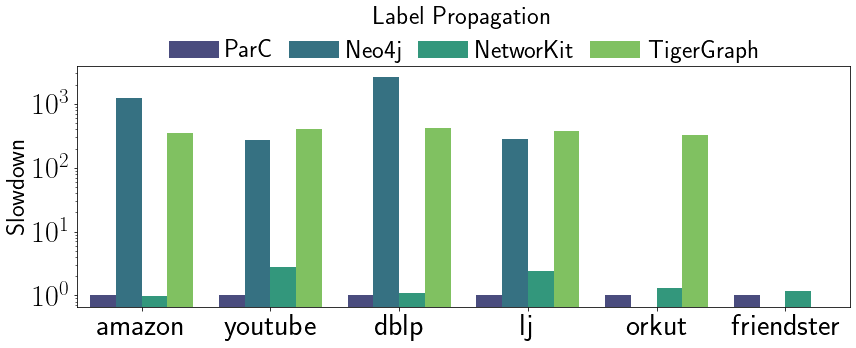

In [162]:
df = pd.read_csv("/Users/sy/Desktop/MIT/clusterer/csv/Graph Clustering Framework  - LP_runtime_compare.csv")
df["Input Graph"] = df["Input Graph"].str.replace("com-", "").str.replace(".gbbs.txt", "").str.replace(".ungraph.txt", "")
df_nk_neo4j = df[df['Config'].str.contains(r'maxIterations: 20(?:,|$)', na=False)]
df_us = df[df['Config'].str.contains(r'max_iteration: 20(?:,|$)', na=False)]
df_tg = df[df['Config'].str.contains(r'maximum_iteration: 20(?:,|$)', na=False)]
df_dlp = df[df["Clusterer Name"]=="NetworKitLPDegreeOrdered"]
df = pd.concat([df_nk_neo4j, df_us, df_tg]) #, df_dlp

df["Clusterer Name"] = df["Clusterer Name"].str.replace("LabelPropagationClusterer", our_name)
df["Clusterer Name"] = df["Clusterer Name"].str.replace("LabelPropagation", "")
df["Clusterer Name"] = df["Clusterer Name"].str.replace("PLP", "")
df["Clusterer Name"] = df["Clusterer Name"].str.replace("LabelProp", "")
# df["Clusterer Name"] = df["Clusterer Name"].str.replace("LPDegreeOrdered", "Deg")


plot_runtime_compare(df, our_name,"../results/out_lp_slowdown.pdf", "Label Propagation")

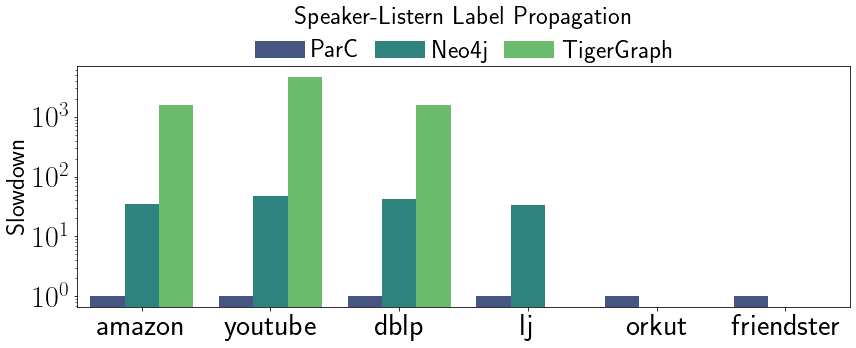

In [163]:
df = pd.read_csv("/Users/sy/Desktop/MIT/clusterer/csv/Graph Clustering Framework  - SLPA.csv")
df["Input Graph"] = df["Input Graph"].str.replace("com-", "").str.replace(".gbbs.txt", "").str.replace(".ungraph.txt", "")
df_neo4j = df[df['Config']=="maxIterations: 20,minAssociationStrength: 0.2"]
df_us = df[df['Config']=="max_iteration: 20,remove_nested: false,prune_threshold: 0.2"]
df_tg = df[df['Config']=="maximum_iteration: 20,threshold: 0.2"]
df = pd.concat([df_neo4j, df_us, df_tg])

df["Clusterer Name"] = df["Clusterer Name"].str.replace("SLPAClusterer", our_name)
df["Clusterer Name"] = df["Clusterer Name"].str.replace("SLPA", "")
df["Clusterer Name"] = df["Clusterer Name"].str.replace("SLLabelProp", "")

plot_runtime_compare(df, our_name ,"../results/out_slpa_slowdown.pdf", "Speaker-Listern Label Propagation")

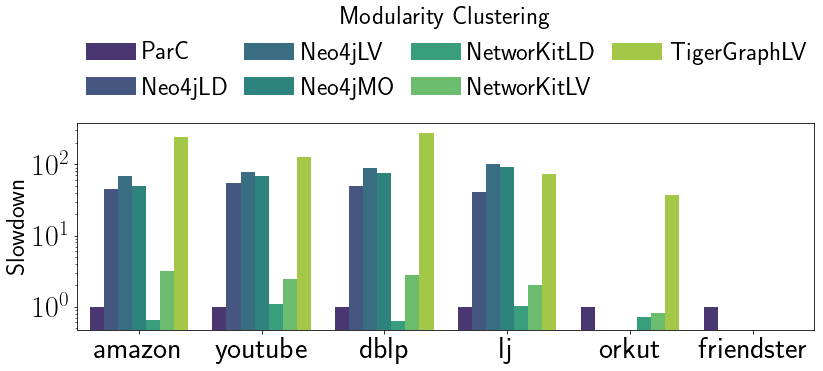

In [180]:
base_addr = "/Users/sy/Desktop/MIT/clusterer/csv/"
df_nk = pd.read_csv(base_addr + "snap_results/stats_snap_nk.csv")
df_neo4j = pd.read_csv(base_addr + "snap_results/stats_snap_neo4j.csv")
df_tg = pd.read_csv(base_addr + "snap_results/stats_snap_tg.csv")
df_google = pd.read_csv(base_addr + "snap_results/stats_snap_google.csv")[["Input Graph", "Clusterer Name", "Config", "Cluster Time"]]


df_nk_sub = df_nk[df_nk['Config'].isin([ "use_refine: False,gamma: 0.9201023981873934,maxIter: 10,recurse: True",
                            "gamma: 0.9201023981873934,iterations: 10"])]
df_neo4j_sub = df_neo4j[df_neo4j['Config'].isin(["gamma: 0.9201023981873934,maxLevels: 10", "maxIterations: 10,maxLevels: 10", 
                              "maxIterations: 10,minCommunitySize: 2"])]
df_tg_sub = df_tg[df_tg['Config'].isin(["maxIterations: 10"])]
df_google = df_google[df_google['Config'].isin([
    "resolution: 0.9201023981873934, correlation_config: {louvain_config: {num_iterations: 10, num_inner_iterations: 10},use_refinement: false,clustering_moves_method: LOUVAIN}",
                             ])]

df = pd.concat([df_nk_sub, df_neo4j_sub, df_tg_sub, df_google])
df["Input Graph"] = df["Input Graph"].str.replace("com-", "").str.replace(".gbbs.txt", "").str.replace(".ungraph.txt", "")
df["Clusterer Name"] = df["Clusterer Name"].str.replace("ParallelModularityClusterer", our_name)
df["Clusterer Name"] = df["Clusterer Name"].str.replace("ModularityOptimization", "MO")
df["Clusterer Name"] = df["Clusterer Name"].str.replace("Parallel", "")
df["Clusterer Name"] = df["Clusterer Name"].str.replace("PLM", "Louvain")
df["Clusterer Name"] = df["Clusterer Name"].str.replace("Louvain", "LV")
df["Clusterer Name"] = df["Clusterer Name"].str.replace("Leiden", "LD")


plot_runtime_compare(df, our_name ,"../results/out_md_slowdown.pdf", "Modularity Clustering", 4, 6)

In [46]:
# df = pd.read_csv("/Users/sy/Desktop/MIT/clusterer/csv/Graph Clustering Framework  - Modularity.csv")
# df["Input Graph"] = df["Input Graph"].str.replace("com-", "").str.replace(".gbbs.txt", "").str.replace(".ungraph.txt", "")
# df = df[df['Config'].isin(["gamma: 1,iterations: 10", "use_refine: False,gamma: 1,maxIter: 10,recurse: True",
#                              "gamma: 1,maxLevels: 10", "maxIterations: 10,maxLevels: 10", 
#                               "maxIterations: 10,minCommunitySize: 2", "maxIterations: 10"
#                              ])]
# df_google = pd.read_csv("/Users/sy/Desktop/MIT/clusterer/csv/snap_results/stats_snap_google.csv")[["Input Graph", "Clusterer Name", "Config", "Cluster Time"]]
# df_google = df_google[df_google['Config'].isin([
#     "resolution: 0.9201023981873934, correlation_config: {louvain_config: {num_iterations: 10, num_inner_iterations: 10},use_refinement: false,clustering_moves_method: LOUVAIN}",
#                              ])]

# df = pd.concat([df, df_google])
# plot_runtime_compare(df, "ParallelModularityClusterer" ,"../results/out_md_slowdown.pdf")